In [1]:
# Importing library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_excel(r"C:\Users\admin\Downloads\1645792390_cep1_dataset.xlsx")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# 1.Preliminary analysis:

### a.Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### b.Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [9]:
df.duplicated().sum()

1

In [10]:
df.loc[df.duplicated(), :]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
df.drop_duplicates(keep='first').shape

(302, 14)

# 2.Prepare a report about the data explaining the distribution of the disease and the related factors 

### a.Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.median()

age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [14]:
df.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

### b.Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [15]:
df_categorical_columns=df.select_dtypes(include='object')
df_categorical_columns

""
0
1
2
3
4
...
298
299
300
301


### c.	Study the occurrence of CVD across the Age category

In [16]:
df[df['target']==1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

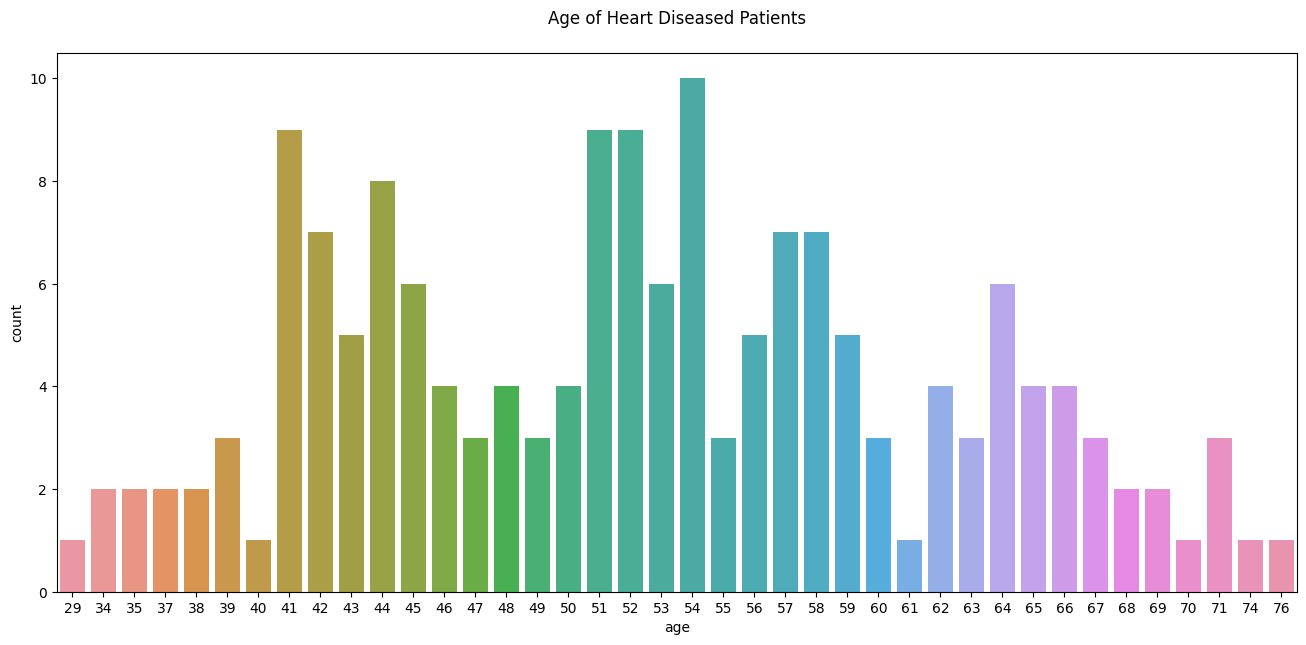

In [17]:
plt.figure(figsize=(16,7))
sns.countplot(df[df['target']==1]['age'])
plt.title('Age of Heart Diseased Patients\n')

### d.	Study the composition of all patients with respect to the Sex category

<AxesSubplot:xlabel='sex', ylabel='count'>

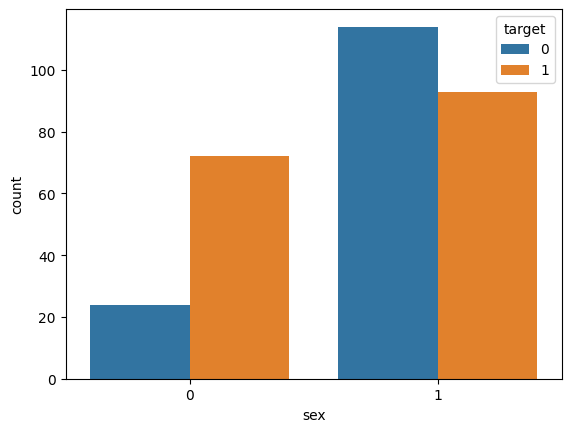

In [18]:
sns.countplot(data=df,x='sex',hue='target')

### e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

<AxesSubplot:xlabel='trestbps', ylabel='target'>

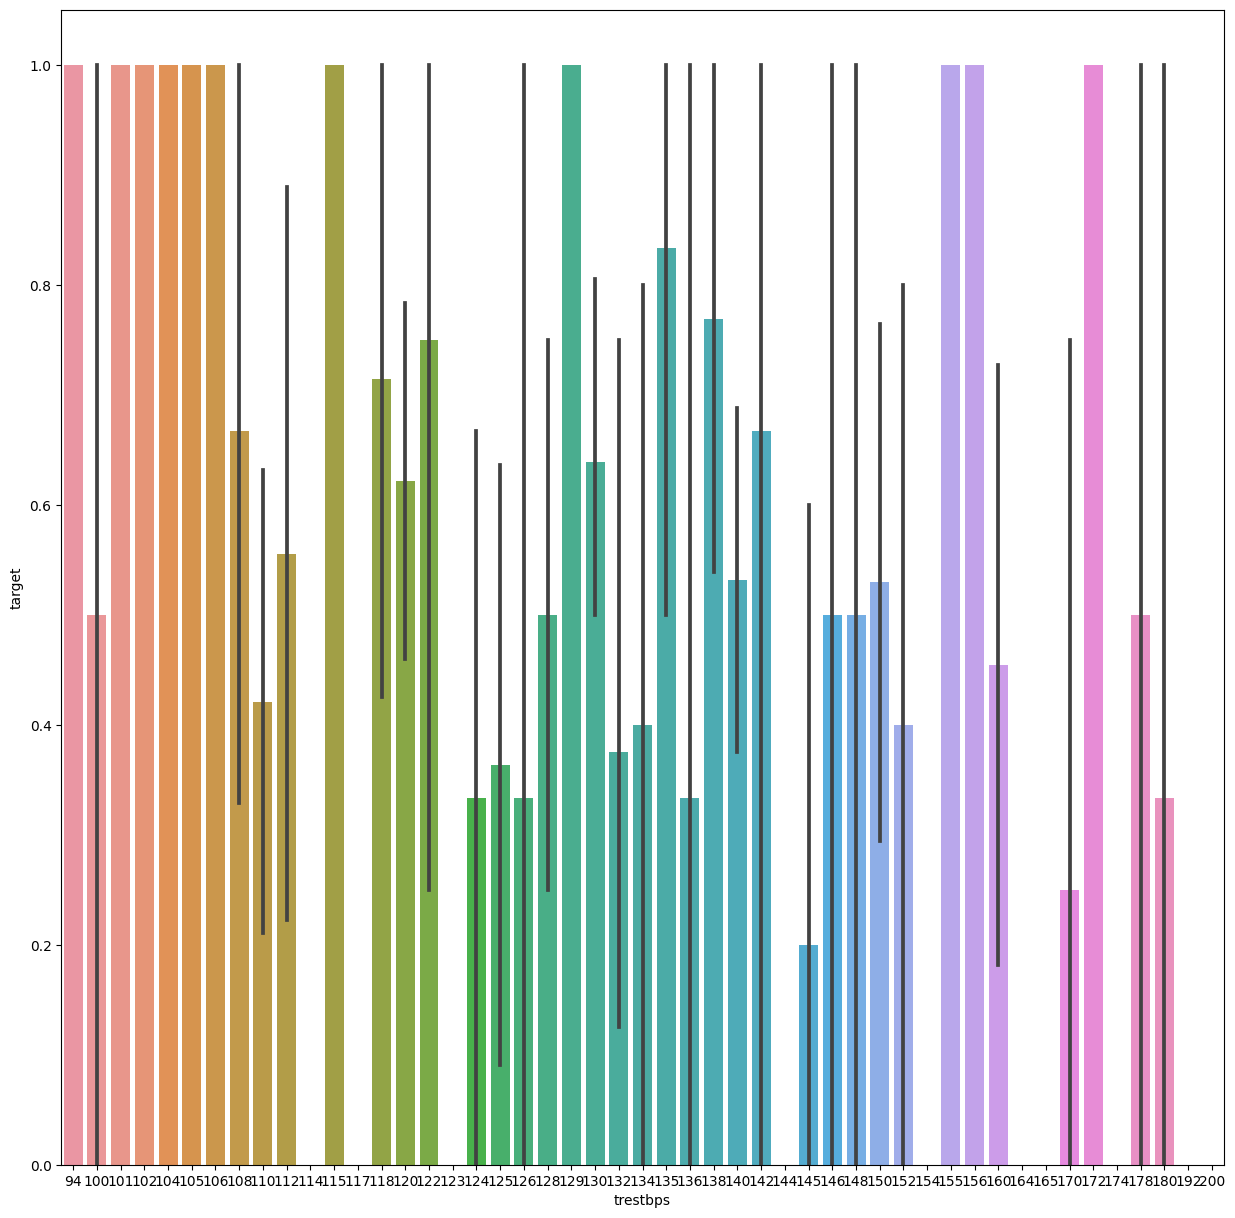

In [19]:
plt.figure(figsize=(15,15))
sns.barplot(df.trestbps,df.target)

### f.	Describe the relationship between cholesterol levels and a target variable

In [20]:
df['chol'].corr(df['target'])

-0.08523910513756908

<AxesSubplot:>

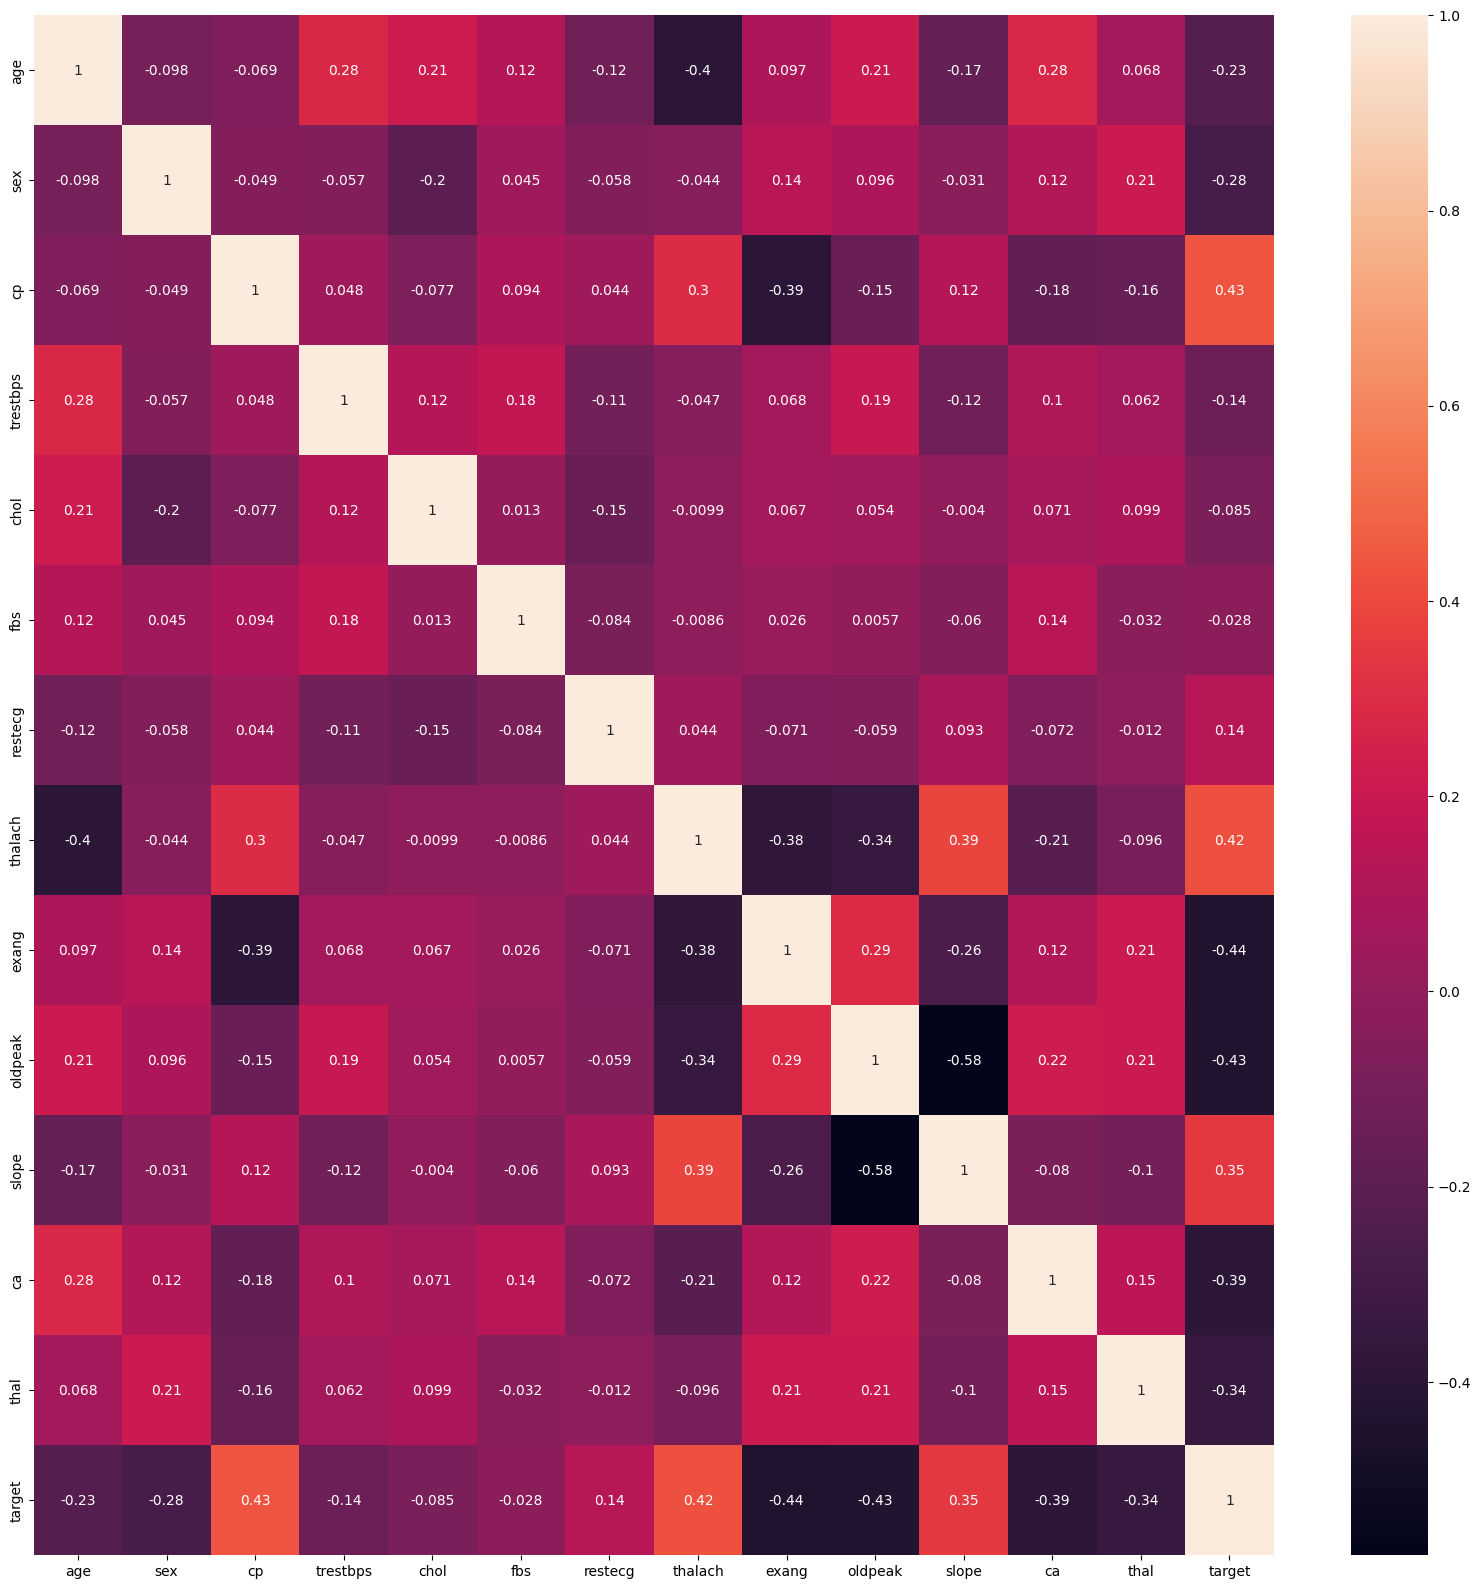

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

### g.	State what relationship exists between peak exercising and the occurrence of a heart attack

Text(36.804208333333335, 0.5, 'ST depression')

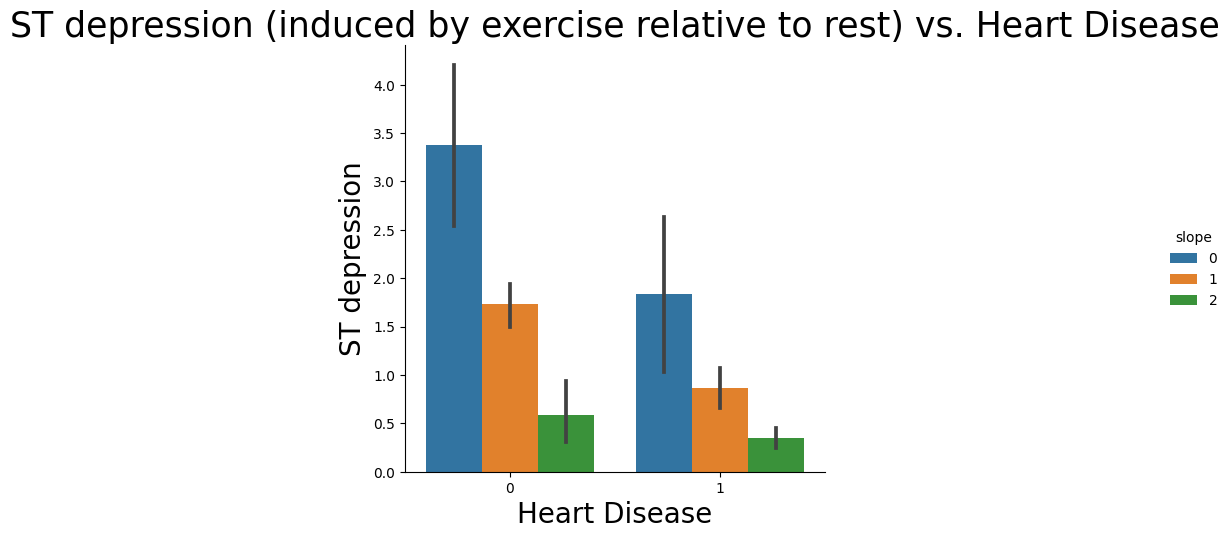

In [22]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=df)

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

### h.	Check if thalassemia is a major cause of CVD

In [23]:
df[['thal','target']].corr()

,thal,target
thal,1.000000,-0.344029
target,-0.344029,1.000000


#### Here according to plot 'cp':Chest Pain is the major cause of CVD

<AxesSubplot:ylabel='Count'>

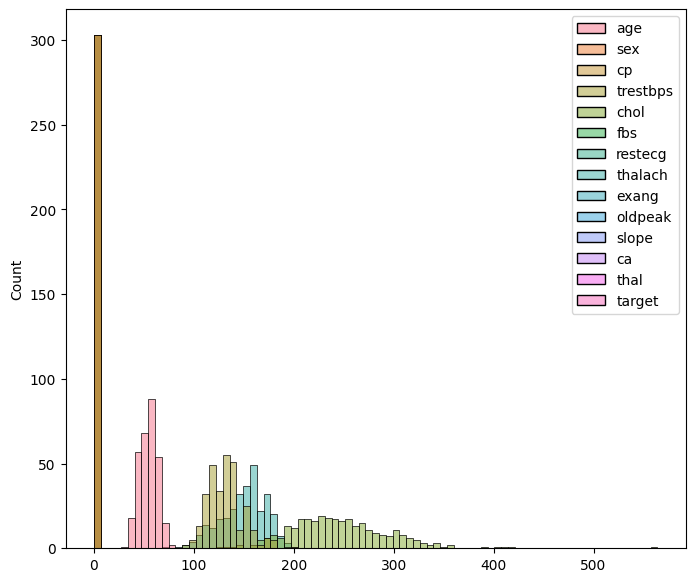

In [24]:
plt.figure(figsize=(8,7))
sns.histplot(data=df)

### i.	List how the other factors determine the occurrence of CVD

<AxesSubplot:>

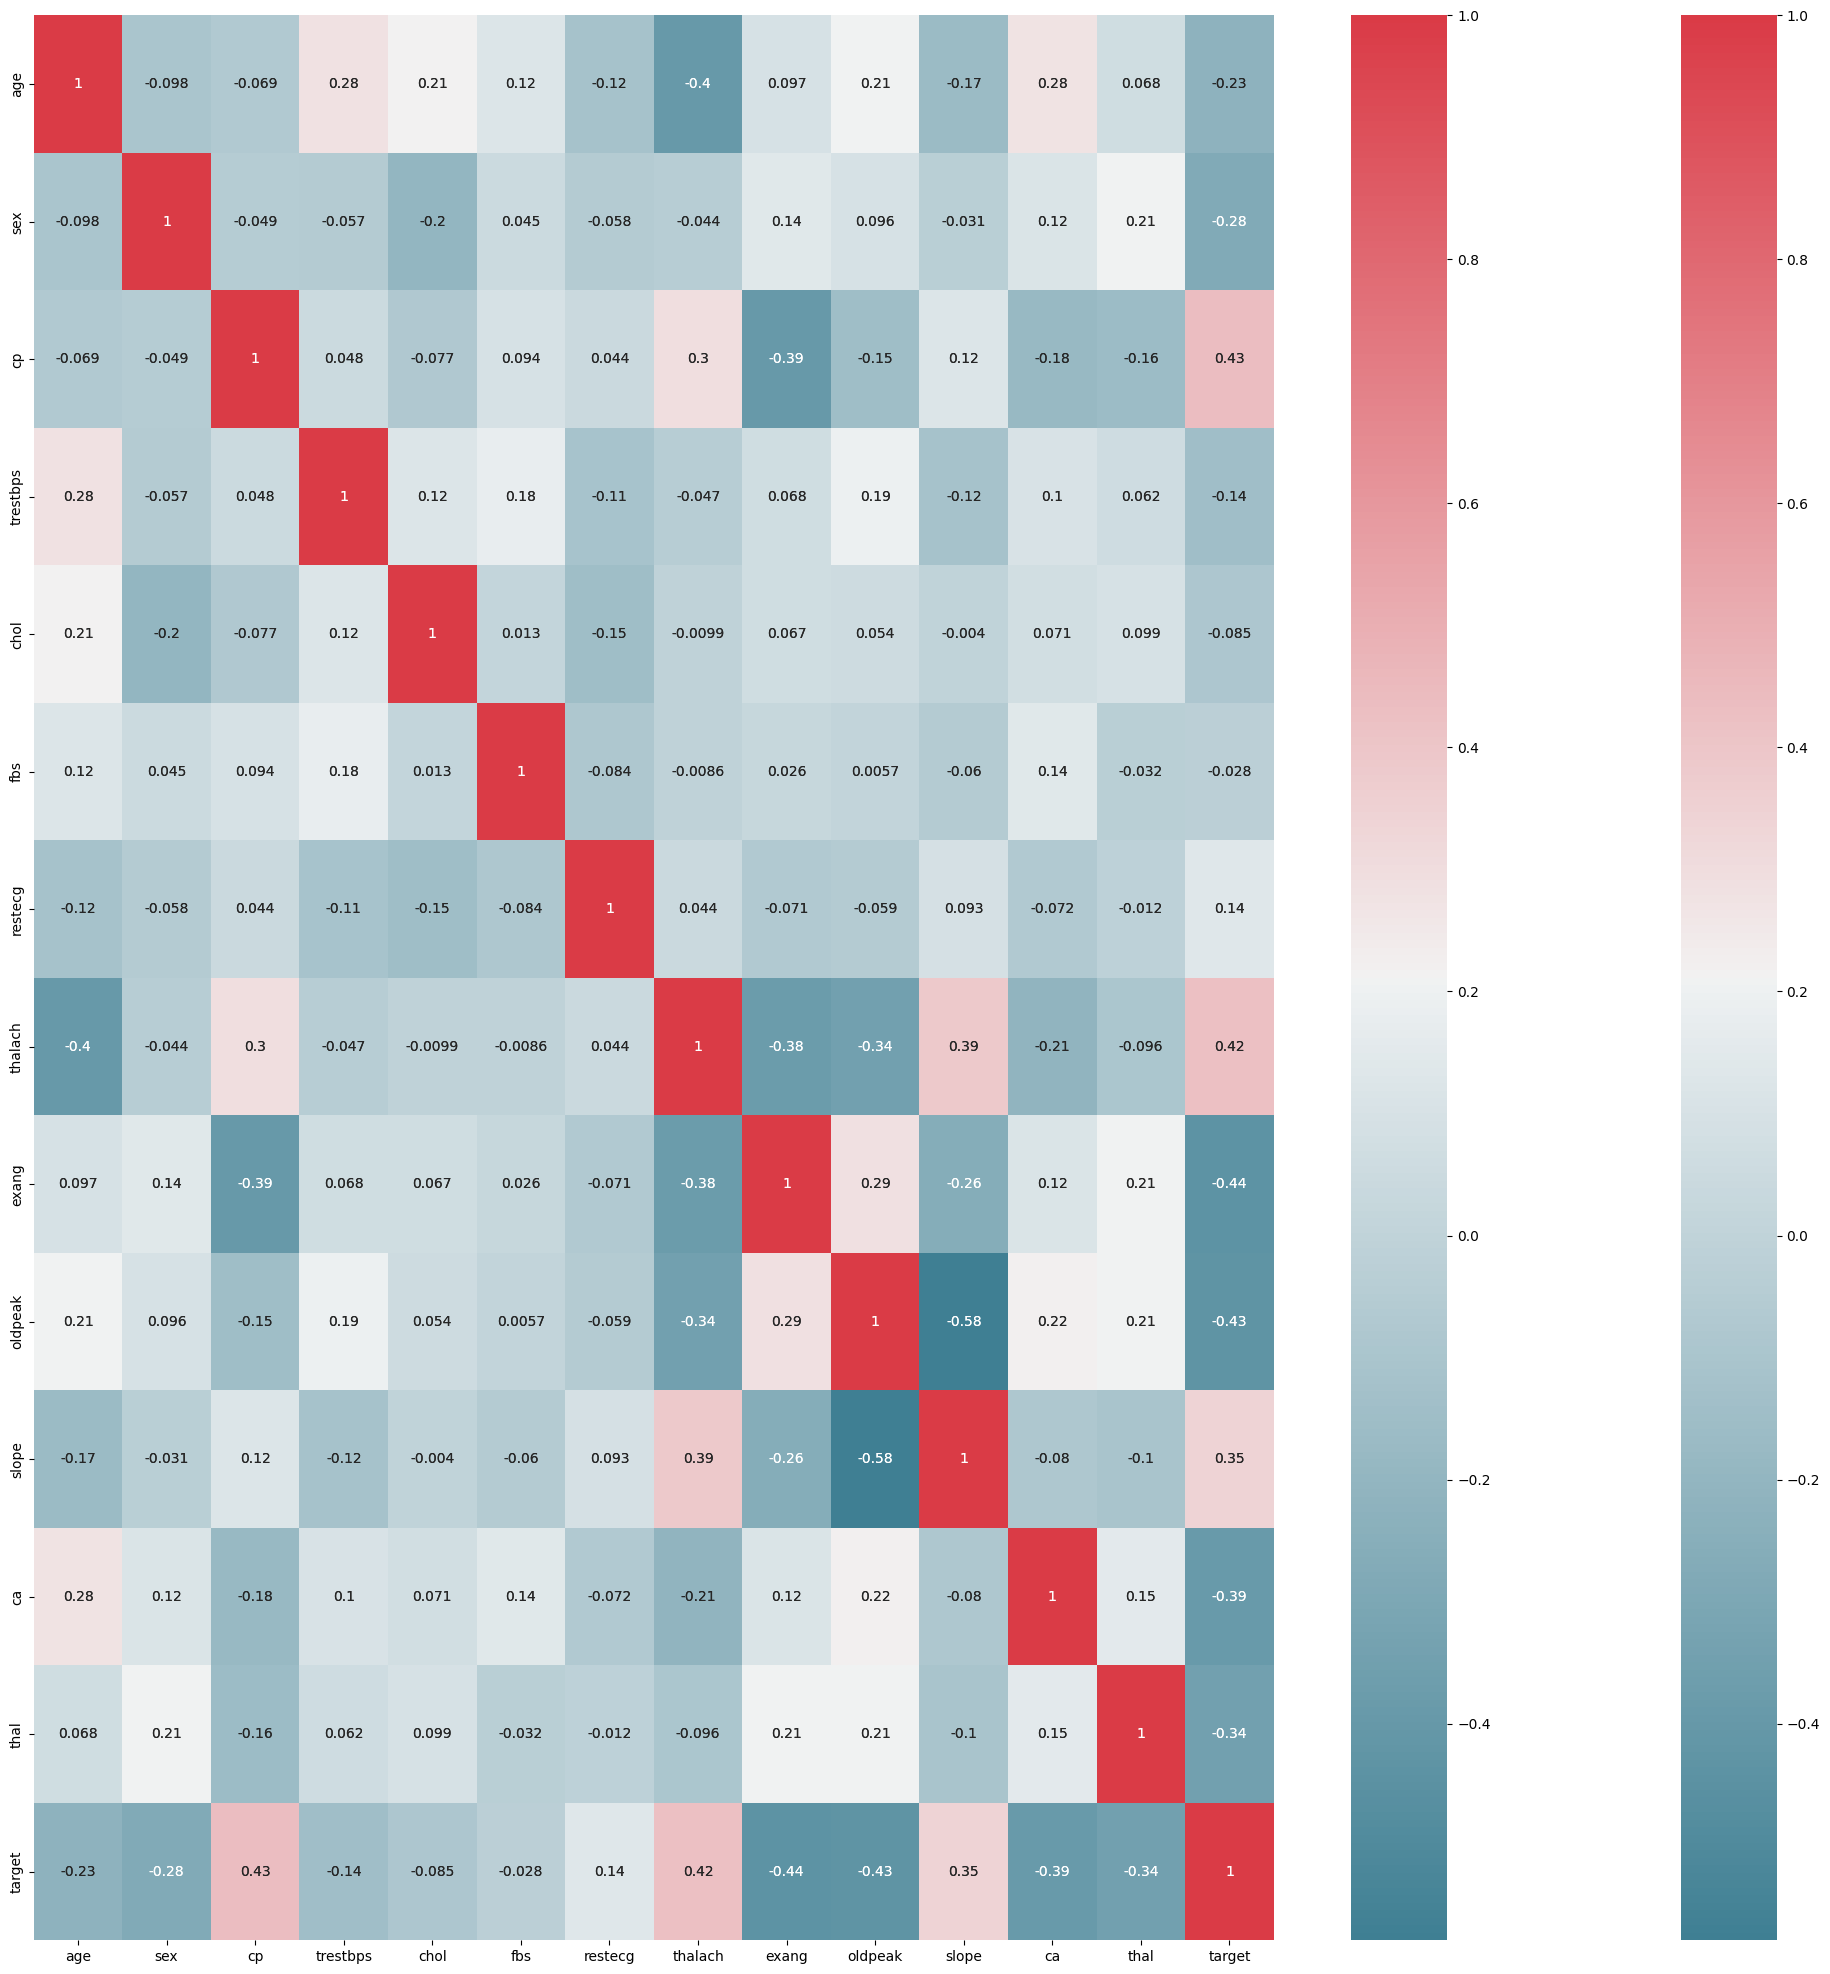

In [25]:
corr = df.corr()
plt.subplots(figsize=(25,25))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

##### We can see there is a positive correlation between chest pain (cp) & target (our predictor). This makes sense since, the greater amount of chest pain results in a greater chance of having heart disease. 

##### In addition, we see a negative correlation between exercise induced angina (exang) & our predictor. This makes sense because when you excercise, your heart requires more blood, but narrowed arteries slow down blood flow.

###  Pairplot with only our Continuous Features.

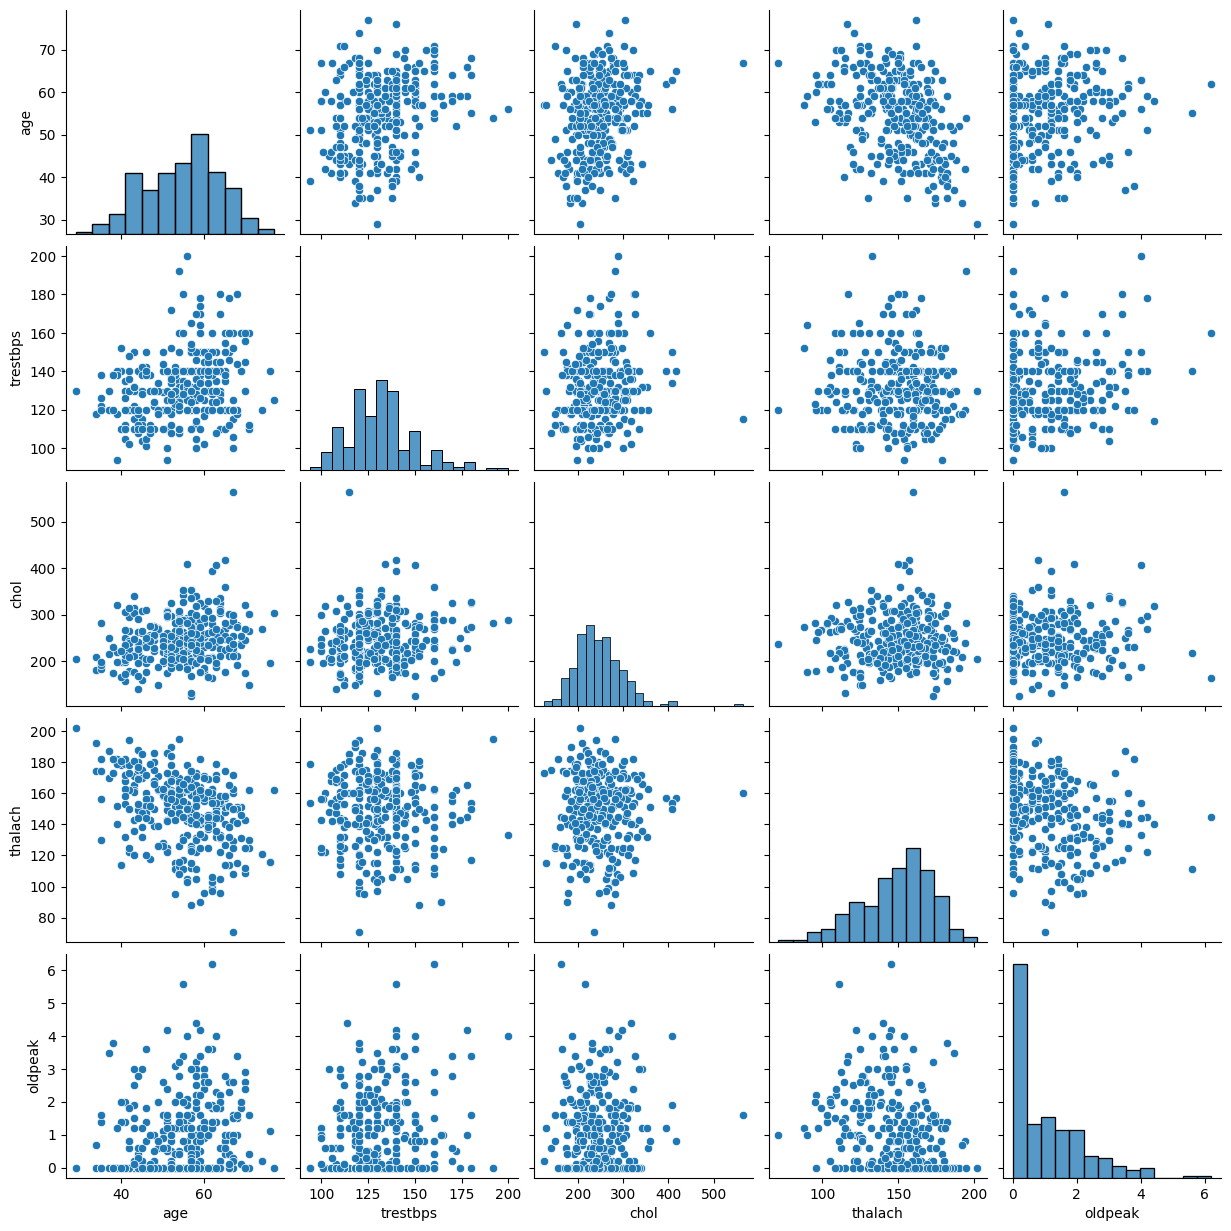

In [26]:
subData = df[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)

### j.	Use a pair plot to understand the relationship between all the given variables

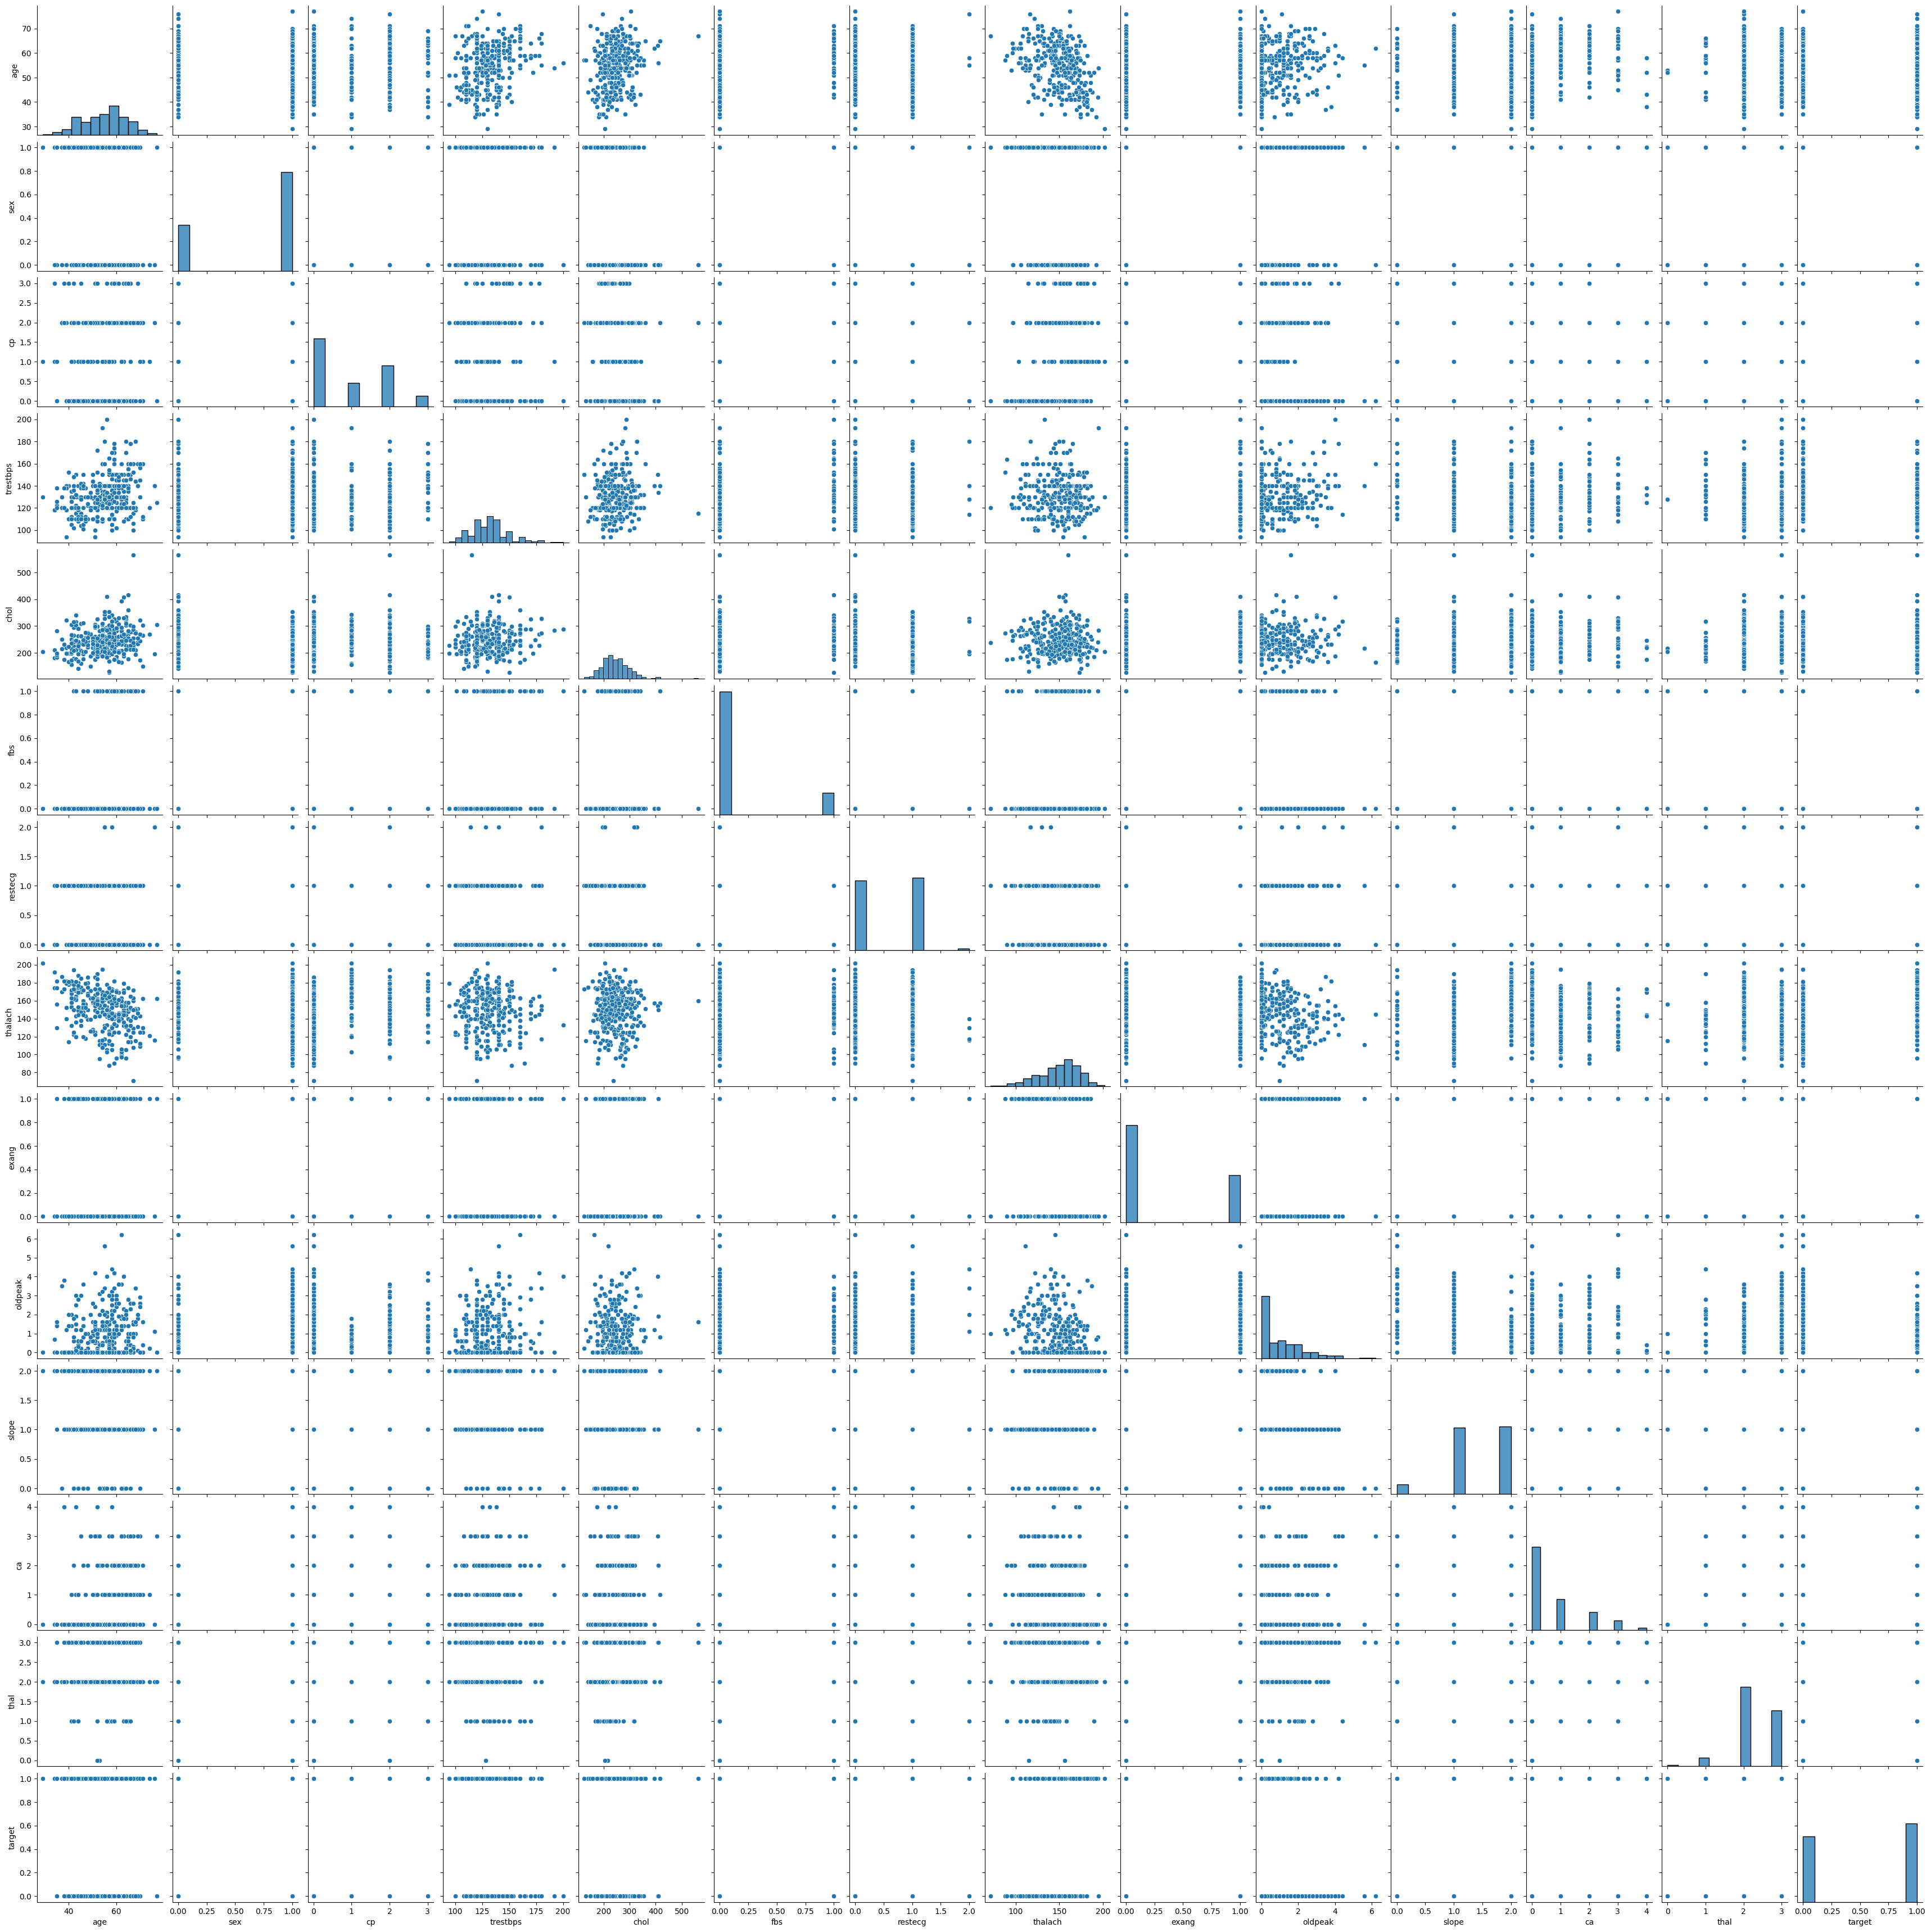

In [27]:
sns.pairplot(df)

# 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [28]:
upper_limit_chol=df['chol'].mean()+3*df['chol'].std()
lower_limit_chol=df['chol'].mean()-3*df['chol'].std()

In [29]:
df['chol']=np.where(
    df['chol']>upper_limit_chol,
    upper_limit_chol,
    np.where(
        df['chol']<lower_limit_chol,
        lower_limit_chol,
        df['chol']
    )
)

In [30]:
upper_limit_trestbps=df['trestbps'].mean()+3*df['trestbps'].std()
lower_limit_trestbps=df['trestbps'].mean()-3*df['trestbps'].std()

In [31]:
df['trestbps']=np.where(
    df['trestbps']>upper_limit_trestbps,
    upper_limit_trestbps,
    np.where(
        df['trestbps']<lower_limit_trestbps,
        lower_limit_trestbps,
        df['trestbps']
    )
)

In [32]:
upper_limit_thalach=df['thalach'].mean()+3*df['thalach'].std()
lower_limit_thalach=df['thalach'].mean()-3*df['thalach'].std()

In [33]:
df['thalach']=np.where(
    df['thalach']>upper_limit_thalach,
    upper_limit_thalach,
    np.where(
        df['thalach']<lower_limit_thalach,
        lower_limit_thalach,
        df['thalach']
    )
)

In [34]:
upper_limit_oldpeak=df['oldpeak'].mean()+3*df['oldpeak'].std()
lower_limit_oldpeak=df['oldpeak'].mean()-3*df['oldpeak'].std()

In [35]:
df['oldpeak']=np.where(
    df['oldpeak']>upper_limit_oldpeak,
    upper_limit_oldpeak,
    np.where(
        df['oldpeak']<lower_limit_oldpeak,
        lower_limit_oldpeak,
        df['oldpeak']
    )
)

In [36]:
X=pd.DataFrame(df.iloc[:,:-1])
y=pd.DataFrame(df.iloc[:,-1])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,stratify=y,random_state=0)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
ss=StandardScaler()

In [41]:
ss.fit_transform(X)

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr=LogisticRegression()

In [44]:
lr.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred=lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred)

0.8852459016393442

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [48]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
y_pred1=rfc.predict(X_test)
y_pred1

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred1)

0.819672131147541

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5378787878787881

### leveraging standard error and p-values from statsmodels for feature selection

In [52]:
from scipy.stats import chi2_contingency
  
# defining the table
data = df
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 9.271804134495523e-53
Dependent (reject H0)
